In [5]:
import os
from pathlib import Path

# 取得當前工作目錄
current = Path(os.getcwd())

# 檢查當前目錄的父目錄名稱並執行相應操作
if current.name == 'Notebooks':
    print(f"Current Path: {current}")
elif current.name == 'test_notebooks' or current.name == 'AOI':
    # 切換到上層目錄
    os.chdir('../')
    # 更新 current 變量為新的工作目錄
    current = Path(os.getcwd())
    print(f"Updated Path: {current}")
else:
    print("No matching parent directory found.")

Current Path: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [6]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary, crop

In [9]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['5_1.tif',
 '5_2.tif',
 'F10.tif',
 'F11.tif',
 'F12.tif',
 'F24.tif',
 'F36.tif',
 'F37.tif',
 'F9.tif']

Image changed to Blue channel
Name: 5_1.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  128
Min:  0
Mean:  2.9757333984375
Standard Deviation:  4.298455731879014


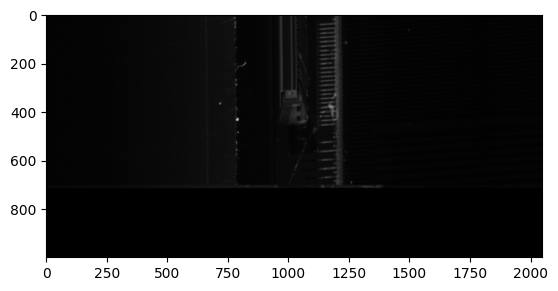

In [12]:
image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.basic_array_info()
origin_im.show()

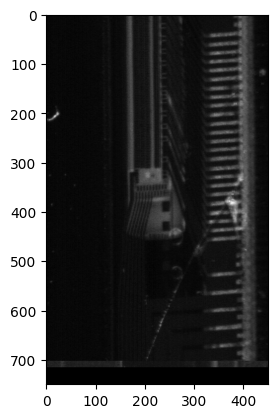

In [13]:
origin_im = origin_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
origin_im.show()

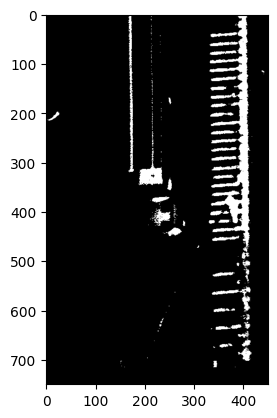

In [14]:
binary_im = origin_im.process(image_binary)

binary_im.show()

In [16]:
from mymodules.filter import morphology

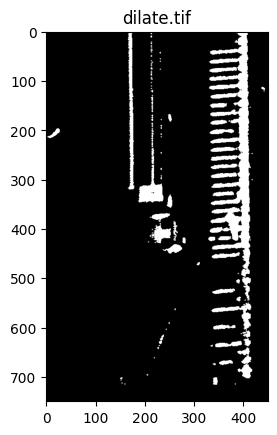

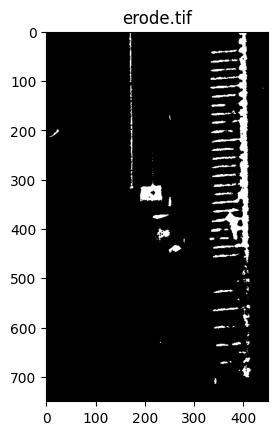

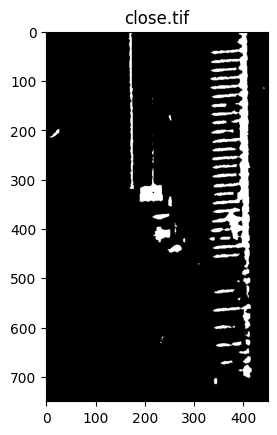

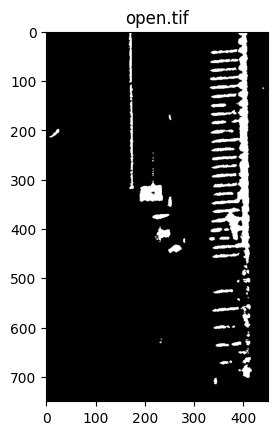

In [17]:
aim_im = origin_im.process(image_binary)

kernel = np.array([
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 0]
], dtype=np.uint8)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(morphology.dilate, params={'kernel': kernel, 'iterations': 1})
process_im.show(title=True)
process_im = aim_im.process(morphology.erode, params={'kernel': kernel, 'iterations': 1})
process_im.show(title=True)
process_im = aim_im.process(morphology.close, params={'kernel': kernel})
process_im = process_im.process(morphology.close, params={'kernel': kernel})
process_im.show(title=True)
process_im = aim_im.process(morphology.open, params={'kernel': kernel})
process_im.show(title=True)


In [31]:
kernel = np.ones((3, 3), dtype=np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

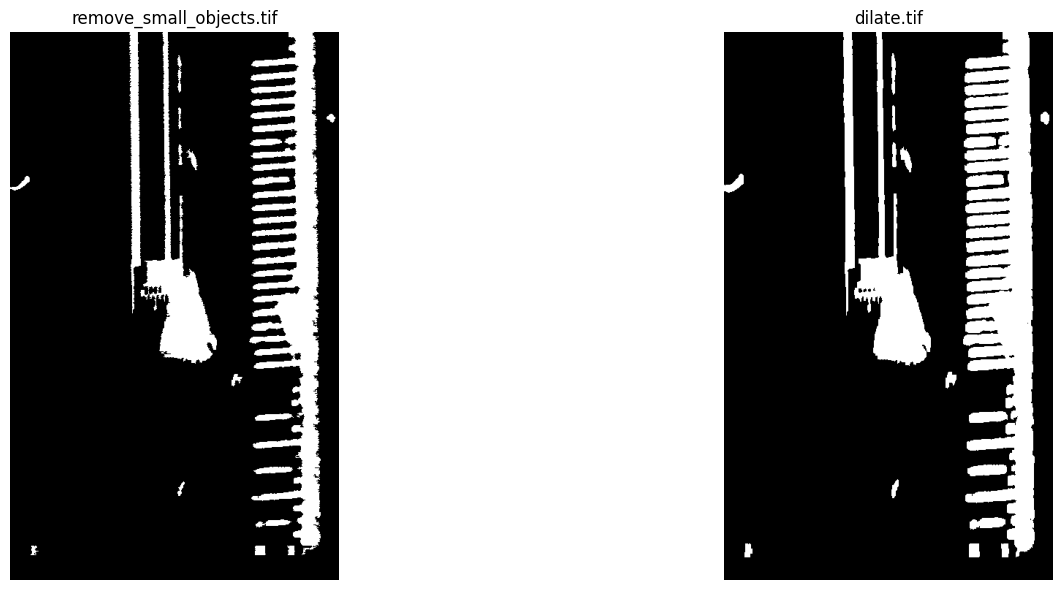

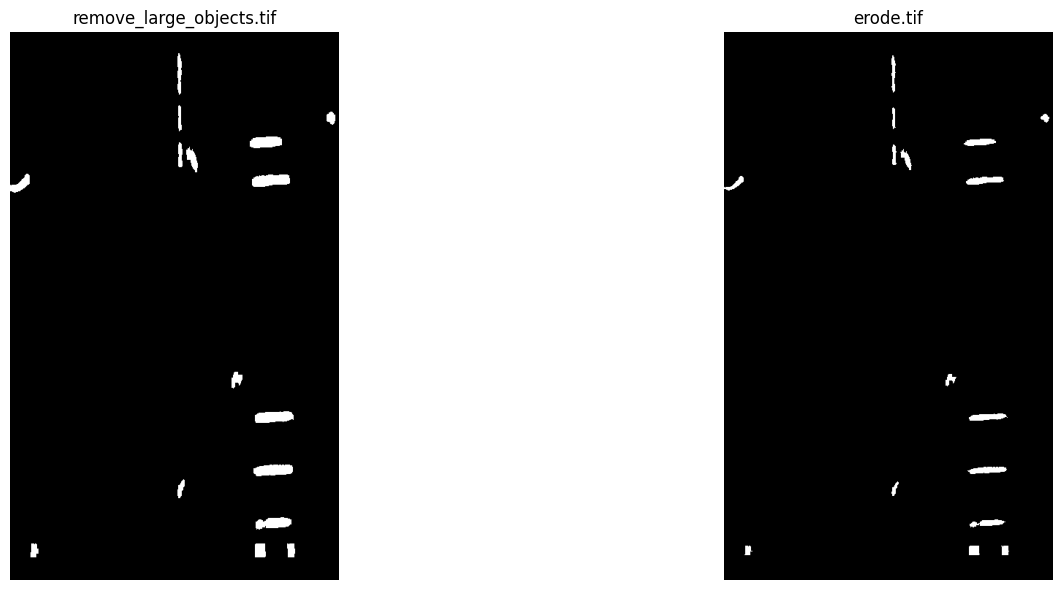

In [18]:
aim_im = origin_im.process(image_binary, params={'standard':1})

# kernel = np.array([
#     [0, 0, 0],
#     [1, 1, 1],
#     [0, 0, 0]
# ], dtype=np.uint8)

kernel = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8)

# kernel = np.ones((5, 5), dtype=np.uint8)

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(morphology.remove_small_objects, params={'min_size':50})
process_im = process_im.process(morphology.dilate, params={'kernel': kernel, 'iterations': 3}, compare=True)
process_im = process_im.process(morphology.remove_large_objects, params={'max_size':2000})
process_im = process_im.process(morphology.erode, params={'kernel': kernel, 'iterations': 3}, compare=True)
# process_im.show(title=True)
